# Importing all moldules

In [46]:
import alpha_vantage
import pandas
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpdates
import datetime

# CLASS ScriptData

In [47]:
class ScriptData(dict):

    global libray 
    libray = dict()

    def __getitem__(self,key):
        #print(type(lb[key]))
        #print(libray[key])
        return libray[key]


    def __setitem__(self, i, o):
        pass
    
    
    
    def __contains__(self, o):
        for key in libray.keys():
            if key == o:
                return True
            
        return False
    
    # __init__ function
    # def __init__(self):
    #     self = Userdict()


    def fetch_intraday_data(self,script):
        key = 'XTP4AMN2N5H9BL51'
        ts = TimeSeries(key,output_format='pandas')
        global data ,meta 
        data, meta = ts.get_intraday(script,interval='60min',outputsize='full')


    def convert_intraday_data(self,script):
        columns=['open','high','low','close','volumn']
        data.columns = columns
        data['timestamp']=data.index
        data.reset_index(drop=True, inplace=True)
        #data['timestamp']=data.index
        libray[script]=data
        #self['GOOGL'] = data
        #print(self[script])




    

In [48]:
script_data = ScriptData()

In [49]:
script_data.fetch_intraday_data('GOOGL')

In [50]:
script_data.convert_intraday_data('GOOGL')

In [51]:
script_data['GOOGL']

,open,high,low,close,volumn,timestamp
0,88.0500,88.1400,88.0000,88.10,13741.0,2022-12-29 20:00:00
1,88.2800,88.3700,87.9900,88.00,13591.0,2022-12-29 19:00:00
2,88.4642,88.4642,88.2800,88.32,13351.0,2022-12-29 18:00:00
3,88.4500,88.4900,88.3101,88.34,980656.0,2022-12-29 17:00:00
4,88.5550,88.8450,88.3400,88.41,4160652.0,2022-12-29 16:00:00
...,...,...,...,...,...,...
612,86.9200,86.9900,86.3800,86.53,174238.0,2022-11-03 09:00:00
613,87.0000,87.0400,86.5200,86.58,54014.0,2022-11-03 08:00:00
614,87.1800,87.1800,86.6600,86.76,21506.0,2022-11-03 07:00:00
615,87.1000,87.3100,87.0600,87.08,8750.0,2022-11-03 06:00:00


In [52]:
script_data.fetch_intraday_data('AAPL')

In [53]:
script_data.convert_intraday_data('AAPL')

In [54]:
script_data['AAPL']

,open,high,low,close,volumn,timestamp
0,129.3500,129.9501,129.2100,129.2500,46795.0,2022-12-29 20:00:00
1,129.5200,129.5200,129.3100,129.3900,41677.0,2022-12-29 19:00:00
2,129.5001,129.5600,129.4200,129.5200,65389.0,2022-12-29 18:00:00
3,129.6100,129.6603,129.4500,129.5200,1220758.0,2022-12-29 17:00:00
4,129.7650,130.2200,129.5600,129.6000,9830884.0,2022-12-29 16:00:00
...,...,...,...,...,...,...
614,143.3602,143.3816,141.3162,141.5056,733100.0,2022-11-03 09:00:00
615,143.2206,143.3203,142.1737,142.3332,207402.0,2022-11-03 08:00:00
616,143.5696,143.7790,142.8517,143.1109,64918.0,2022-11-03 07:00:00
617,143.6294,143.7291,143.2804,143.5696,40924.0,2022-11-03 06:00:00


In [55]:
'GOOGL' in script_data

True

In [56]:
'AAPL' in script_data 

True

In [57]:
'UNCLE' in script_data

False

# Indicator method


In [58]:
def indicator1(df,timeperiod=10):
    df1 = pandas.DataFrame()
    df1['indicator'] = df['close'].rolling(timeperiod).mean()
    return df1

In [59]:
indicator1(script_data['GOOGL'], timeperiod=5)

,indicator
0,NaN
1,NaN
2,NaN
3,NaN
4,88.23400
...,...
612,85.58364
613,85.82000
614,86.23000
615,86.49000


In [60]:
indicator1(script_data['AAPL'], 5)

,indicator
0,NaN
1,NaN
2,NaN
3,NaN
4,129.45600
...,...
614,140.14608
615,140.56634
616,141.37198
617,141.95728


In [222]:

class Strategy(ScriptData):
    
    def __init__(self,script):
        self.script = script


    def get_script_data(self):
        self.fetch_intraday_data(self.script)
        self.convert_intraday_data(self.script)
        global df
        global indicator_data
        df = data['close'].to_frame()
        df['timestamp'] = data['timestamp']
        df['indicator_data'] = indicator1(df,5)

        

    def get_signals(self):
        
        signals = df
        signals['signal'] = np.nan
        for i in range(len(df)):
            if df.iloc[i-1]['close']>df.iloc[i-1]['indicator_data'] and df.iloc[i]['close'] < df.iloc[i]['indicator_data']:
                signals['signal'][i] = 'BUY'
            elif df.iloc[i-1]['close'] < df.iloc[i-1]['indicator_data'] and df.iloc[i]['close'] > df.iloc[i]['indicator_data']:
                signals['signal'][i] = 'SELL'

        return signals[['timestamp','signal']].dropna()
        
        
    def plot(self):
        #create figure
        plt.figure()

        prices = data
        #define width of candlestick elements
        width = .4
        width2 = .05

        #define up and down prices
        up = prices[prices.close>=prices.open]
        down = prices[prices.close<prices.open]

        #define colors to use
        col1 = 'green'
        col2 = 'red'

        #plot up prices
        plt.bar(up.timestamp,up.close-up.open,width,bottom=up.open,color=col1)
        plt.bar(up.timestamp,up.high-up.close,width2,bottom=up.close,color=col1)
        plt.bar(up.timestamp,up.low-up.open,width2,bottom=up.open,color=col1)

        #plot down prices
        plt.bar(down.timestamp,down.close-down.open,width,bottom=down.open,color=col2)
        plt.bar(down.timestamp,down.high-down.open,width2,bottom=down.open,color=col2)
        plt.bar(down.timestamp,down.low-down.close,width2,bottom=down.close,color=col2)

        #rotate x-axis tick labels
        plt.xticks(rotation=45, ha='right')

        #display candlestick chart
        plt.tight_layout()
        plt.show()

            
         
            
            
        
        
        


In [223]:
strategy = Strategy('NVDA')
strategy.get_script_data()

In [224]:
strategy.get_signals()

,timestamp,signal
7,2022-12-29 13:00:00,SELL
9,2022-12-29 11:00:00,BUY
21,2022-12-28 15:00:00,SELL
24,2022-12-28 12:00:00,BUY
26,2022-12-28 10:00:00,SELL
...,...,...
608,2022-11-03 15:00:00,SELL
609,2022-11-03 14:00:00,BUY
610,2022-11-03 13:00:00,SELL
613,2022-11-03 10:00:00,BUY


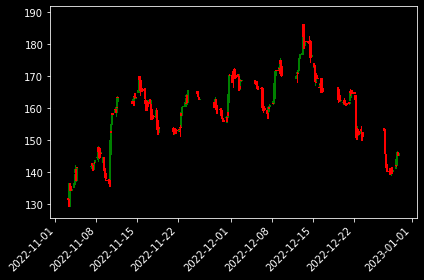

In [225]:
strategy.plot()